In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




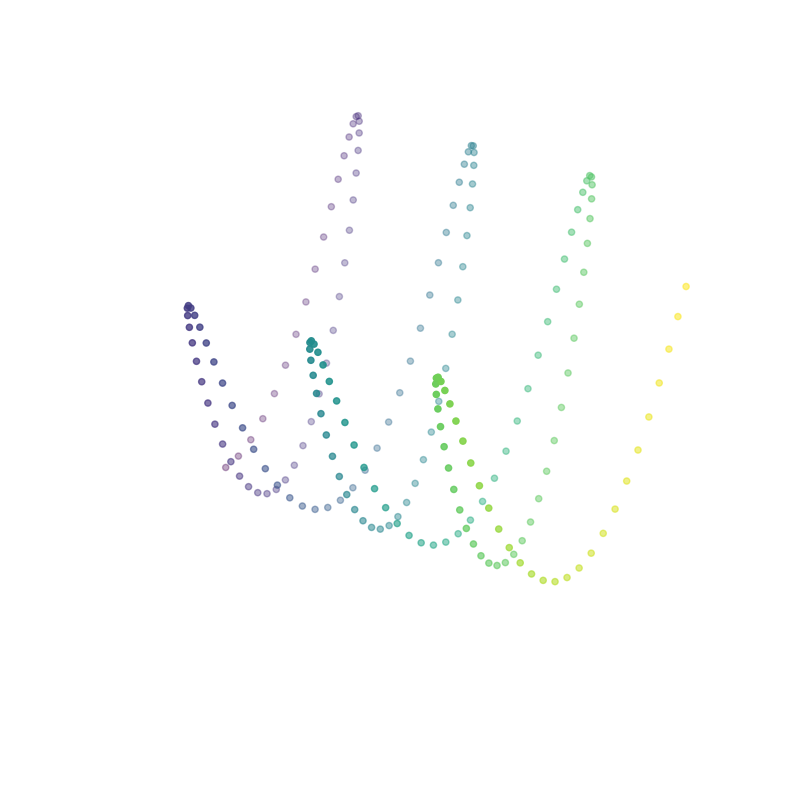

In [3]:
# Change the Size of Graph using 
# Figsize
fig = plt.figure(figsize=(10, 10))

# Generating a 3D sine wave
ax = plt.axes(projection='3d')

# Creating array points using 
# numpy
x = np.arange(0, 20, 0.1)
y = np.sin(x)
z = y*np.sin(x)
c = x + y

# To create a scatter graph
ax.scatter(x, y, z, c=c)

# turn off/on axis
plt.axis('off')

# show the graph
plt.show()


In [4]:
from dataretrieval import nwis
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf

#!pip uninstall scikit-learn -y
#!pip install scikit-learn 
import sklearn
# Print the version of scikit-learn
print(sklearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from datetime import datetime
current_time = datetime.now()
print(current_time.strftime("%Y-%m-%d %H:%M:%S"))

startDate   =  "1995-10-01"
endDate     =  "2024-09-30"
model_months=  [6 ,7,8]
model_site  = [
    "13092747"  
              ]
idv         = [ "00060_Mean" ,"tmean" ,"Days_Since_October_1st" ]

1.6.1
2025-05-06 13:55:27


In [5]:
site_info = nwis.get_info(sites= model_site )
site_info_df = pd.DataFrame( site_info[0] )
site_info_df["site_no"]=site_info_df["site_no"].astype(str)
columns_to_save = ['site_no', 'dec_lat_va', 'dec_long_va', 'drain_area_va' 
                   ,   'alt_va'
                  ]
filtered_df = site_info_df[columns_to_save]
#print(filtered_df)

parameterCode = ["00010","00060"  ]
dailyStreamtemp = nwis.get_dv(sites= model_site
                              , parameterCd=parameterCode, start=startDate, end=endDate) 
dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year
dailyStreamtemp_df = dailyStreamtemp_df[ dailyStreamtemp_df['Month'].isin( model_months  )    ]

In [6]:
shared_url = "https://drive.google.com/file/d/1z9w4rk21CCbbuOjwsru1pgkiOsYgVX6h/view?usp=share_link"
file_id = shared_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"
prism_df = pd.read_csv(download_url)

prism_df['date'] = pd.to_datetime( prism_df['date']) 
def days_since_october_first(date):
    october_first = pd.Timestamp(year=date.year, month=10, day=1)
    days_difference = (date - october_first).days   
    return days_difference if days_difference >= 0 else days_difference + 365
prism_df['Days_Since_October_1st'] =  prism_df['date'].apply(days_since_october_first)
prism_df[ "rad_d"   ] = 2 * np.pi * prism_df[ "Days_Since_October_1st"   ] /365
prism_df["site_no"] =prism_df["site_no"].astype(str)

# Add a leading 0 to strings with exactly 7 characters
prism_df['site_no'] = prism_df['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)
prism_df["site_no"] =prism_df["site_no"].astype(str)


prism_df['Date'] = prism_df['date'].dt.date

In [7]:
prism_df = prism_df[['tmean' , "site_no", 'Date', "rad_d", "Days_Since_October_1st" ]]
dailyStreamtemp_df = dailyStreamtemp_df[[    'Date',
       'site_no',  
  '00010_Mean', '00060_Mean', 
       'Month', 'Year' ]]
result = pd.merge(prism_df, dailyStreamtemp_df, on=['Date','site_no'], how='inner')
#print(result)

#print(result.columns)

# Count the number of NaN values in each column
na_count = result.isna().sum()
# Print the result
print(na_count)
# Drop rows with any NaN values
df_cleaned = result.dropna()
# Print the cleaned DataFrame
print(df_cleaned.head())
# Count the number of NaN values in each column
na_count = df_cleaned.isna().sum()
# Print the result
print(na_count )

tmean                        0
site_no                      0
Date                         0
rad_d                        0
Days_Since_October_1st       0
00010_Mean                1291
00060_Mean                   0
Month                        0
Year                         0
dtype: int64
        tmean   site_no        Date     rad_d  Days_Since_October_1st  \
42  23.403002  13092747  1996-07-13  4.906049                     285   
43  23.366001  13092747  1996-07-14  4.923263                     286   
44  24.110001  13092747  1996-07-15  4.940477                     287   
45  21.022001  13092747  1996-07-16  4.957691                     288   
46  21.528002  13092747  1996-07-17  4.974906                     289   

    00010_Mean  00060_Mean  Month  Year  
42        18.6       120.0      7  1996  
43        18.4       130.0      7  1996  
44        18.3       132.0      7  1996  
45        17.9       134.0      7  1996  
46        18.0       155.0      7  1996  
tmean            

In [8]:
def get_water_year(date):
        if date.month >= 10: 
            return date.year +1
        else:   
            return date.year

df_cleaned['water_year'] = df_cleaned['Date'].apply(get_water_year)

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_1846/286143813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['water_year'] = df_cleaned['Date'].apply(get_water_year)


In [9]:
df_cleaned

,tmean,site_no,Date,rad_d,Days_Since_October_1st,00010_Mean,00060_Mean,Month,Year,water_year
42,23.403002,13092747,1996-07-13,4.906049,285,18.6,120.0,7,1996,1996
43,23.366001,13092747,1996-07-14,4.923263,286,18.4,130.0,7,1996,1996
44,24.110001,13092747,1996-07-15,4.940477,287,18.3,132.0,7,1996,1996
45,21.022001,13092747,1996-07-16,4.957691,288,17.9,134.0,7,1996,1996
46,21.528002,13092747,1996-07-17,4.974906,289,18.0,155.0,7,1996,1996
...,...,...,...,...,...,...,...,...,...,...
2663,20.303099,13092747,2024-08-27,5.680688,330,16.0,150.0,8,2024,2024
2664,15.999650,13092747,2024-08-28,5.697902,331,15.5,143.0,8,2024,2024
2665,15.041100,13092747,2024-08-29,5.715116,332,14.6,143.0,8,2024,2024
2666,18.663349,13092747,2024-08-30,5.732331,333,14.9,148.0,8,2024,2024


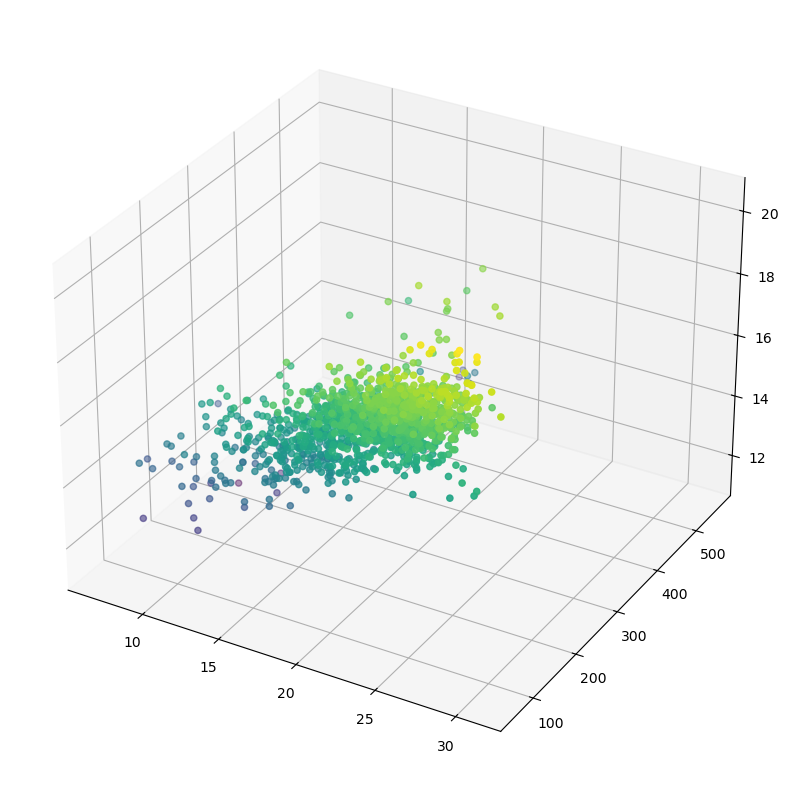

In [12]:
fig = plt.figure(figsize=(10, 10))

# Generating a 3D sine wave
ax = plt.axes(projection='3d')

# Creating array points using 
# numpy
x = df_cleaned['tmean']

y =  df_cleaned['00060_Mean']
z =  df_cleaned['00010_Mean']
#c = x + y

# To create a scatter graph
ax.scatter(x, y, z, c=z)

# turn off/on axis
#plt.axis('off')

# show the graph
plt.show()
